In [1]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
sns.set_style('darkgrid')

In [3]:
full_data = pd.read_csv('full_data.csv', index_col = ['YEAR','MONTH'])

C:\Users\miste\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [4]:
full_data.drop_duplicates(inplace = True)

There were about 200,000 duplicate columns, where every column in the row was equal

In [5]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1577879 entries, (2023, 10) to (2023, 10)
Data columns (total 10 columns):
DAY           1577879 non-null object
PLAYERID      1577879 non-null object
PLATFORM      1577879 non-null int64
CHARACTER     1577879 non-null object
MAP           1577879 non-null object
EVENT         1577879 non-null object
PLAYEDTIME    1577879 non-null int64
LEVEL         608281 non-null float64
DAY_NUM       1577879 non-null int64
TIME          1577879 non-null object
dtypes: float64(1), int64(3), object(6)
memory usage: 123.4+ MB


In [6]:
full_data.head()

DAY                          PLAYERID  PLATFORM  \
YEAR MONTH                                                            
2023 10     25 19:00:00  00001acbf8c3f062e675acff49a4bc04         2   
     10     09 19:00:00  00000a3164b82084ae789049fc017d69         3   
     10     13 19:00:00  000039c73d105e3ee64c972d95940cd0         3   
     10     14 19:00:00  00003a8cacb62ea7659fe5e6ee7795a8         3   
     10     15 19:00:00  00000a5be05326fac47d729e90de04ac         3   

                     CHARACTER                  MAP    EVENT  PLAYEDTIME  \
YEAR MONTH                                                                 
2023 10     BPChar_Operative_C          Outskirts_P  LevelUp       16563   
     10         BPChar_Siren_C  CreatureSlaughter_P  LevelUp       30601   
     10         BPChar_Siren_C           Wetlands_P  LevelUp       44831   
     10         BPChar_Siren_C             Prison_P  LevelUp       65665   
     10         BPChar_Siren_C          Monastery_P  LevelUp       16128   

            LEVEL  DAY_NUM       TIME  
YEAR MONTH                             
2023 10       NaN       25   19:00:00  
     10       NaN        9   19:00:00  
     10       NaN       13   19:00:00  
     10       NaN       14   19:00:00  
     10       NaN       15   19:00:00

There are only 10,000 unique players, but over 1.5 million rows. This averages to around 150 rows per Player. A new row is added whenever the player changes character, map, level, or signs in on a new day. 

In [7]:
full_data.PLAYERID.nunique()

9995

I want to see how people are playing the game in terms of when they've played the game. To do this, I am going to count up how many times unique players play the game on each day. So, if someone plays twice in the same day, they will only be counted once. 

In [8]:
# grouping by year, month and day and counting unique players
players_per_time = full_data.groupby(['YEAR','MONTH','DAY_NUM']).nunique().PLAYERID

In [9]:
# using the above to group by month and find the average number of players per month
average_monthly_players = players_per_time.reset_index().groupby('MONTH').PLAYERID.mean()

In [10]:
sorted_average = average_monthly_players.sort_values(ascending = False) 

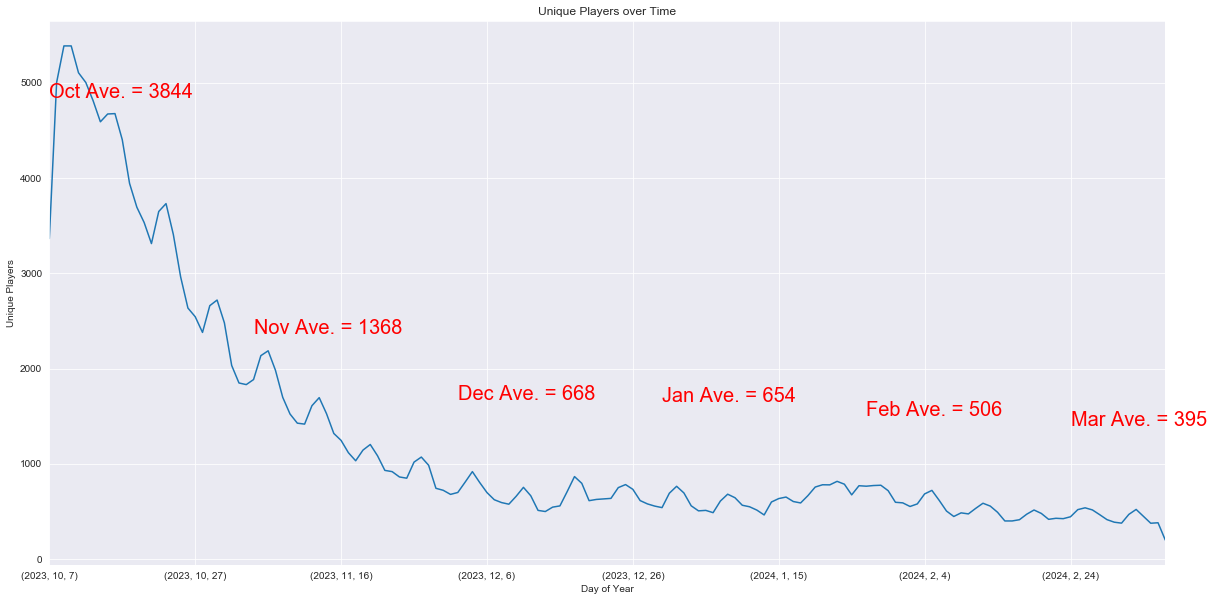

In [11]:
# Plotting unique players per day as well as the average number of unique players per month as text

_ = players_per_time.plot(figsize = (20,10), title = 'Unique Players over Time')
_ = plt.ylabel('Unique Players')
_ = plt.xlabel('Day of Year')

for month, ave, x  in zip(['Oct','Nov','Dec','Jan','Feb','Mar'], sorted_average,np.arange(0,195,28)):
    # adding text 
    _ = plt.text(x = x, y = ave+ 1000, s = '{} Ave. = {}'.format(month,round(ave)), size = 20, color = 'r')



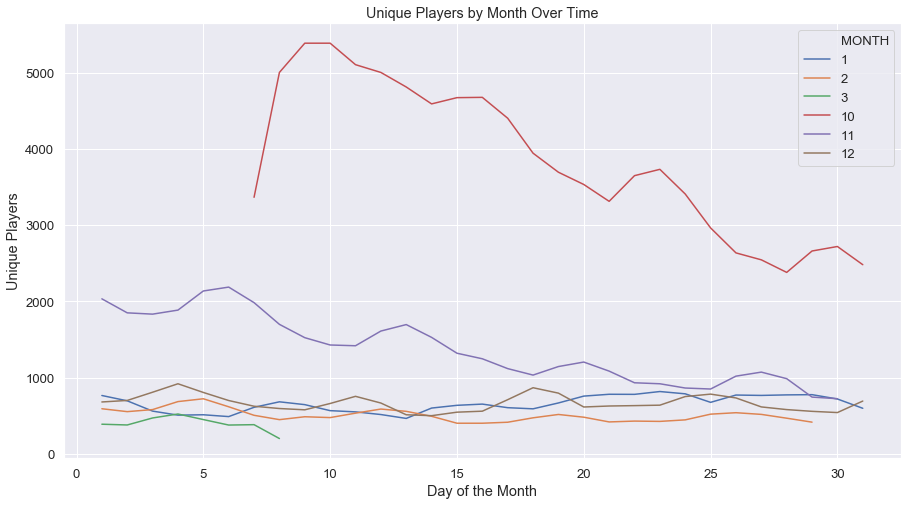

In [12]:
# another plot, except showing on a 1-31 day scale, with the months as different lines

sns.set(font_scale = 1.2)

fig_dims = (15, 8)
fig, ax = plt.subplots(figsize=fig_dims)

_ = sns.lineplot(x="DAY_NUM", y="PLAYERID",
                  hue="MONTH", data=players_per_time.reset_index(),\
                  legend = 'full', palette = sns.color_palette(n_colors = 6)).set_title('Unique Players by Month Over Time')

_ = plt.xlabel('Day of the Month')
_ = plt.ylabel('Unique Players')

In [13]:
# grouping by character and counting the unique number of players who played as that character
players_per_character = full_data.groupby('CHARACTER').nunique().PLAYERID

Beastmaster is most played character. Almost 7/10, or 70%, of all players play as Beastmaster at some point. 

Of those with "BPChar", Iron Bear and Dakkabear come last, and that is because they are summonable characters, and not actually playable characters. They are summoned by the Gunner. The least played of the 4 Main Classes is the Operative.

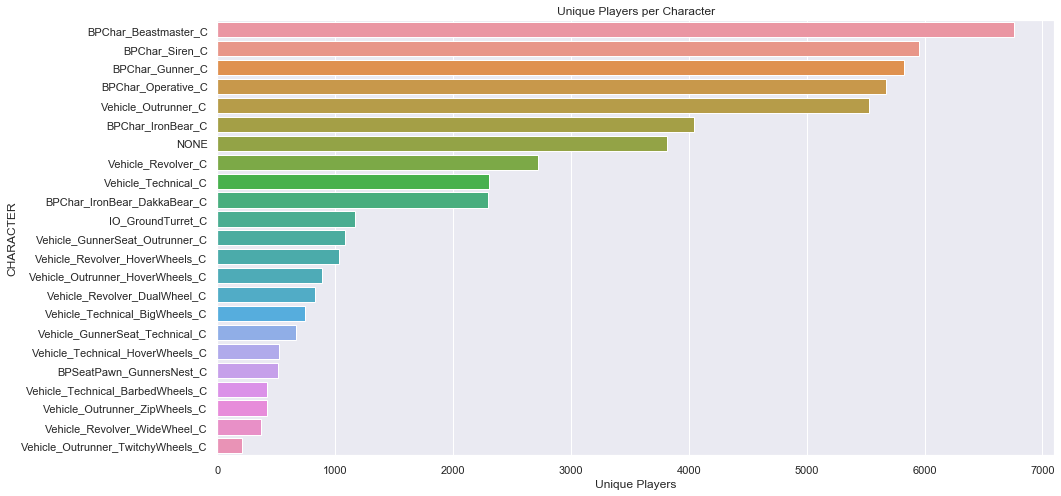

In [14]:
sns.set(font_scale = 1)

fig_dims = (15, 8)
fig, ax = plt.subplots(figsize=fig_dims)

_ = sns.barplot(x = 'PLAYERID', y = 'CHARACTER', data = players_per_character.reset_index()\
                .sort_values(by = 'PLAYERID',ascending = False) ).set_title('Unique Players per Character')

_ = plt.xlabel('Unique Players')

By Viewing the data, I can see that the PLAYEDTIME is the TOTAL played time, not the played time in that session. I can tell that this is the case because it only ever increases for each Player. 

In [16]:
# PLAYEDTIME for unique players increases only. And for people who play alot (up to 50,000 second or 13 hours in PLAYEDTIME col)
# I find it hard to believe they played that much in one sitting

full_data.sort_values(by = ['PLAYERID','DAY'])[['PLAYERID','PLAYEDTIME']]

PLAYERID  PLAYEDTIME
YEAR MONTH                                              
2024 1      000000001330b419a08d61c066962df8         672
     1      000000001330b419a08d61c066962df8         774
     1      000000001330b419a08d61c066962df8        1582
     1      000000001330b419a08d61c066962df8        5925
     1      000000001330b419a08d61c066962df8        3136
...                                      ...         ...
2023 11     00004bec42627b754c087f5eb8e71e77       51316
     11     00004bec42627b754c087f5eb8e71e77       49766
     11     00004bec42627b754c087f5eb8e71e77       47513
     11     00004bec42627b754c087f5eb8e71e77       54059
     11     00004bec42627b754c087f5eb8e71e77       48366

[1577879 rows x 2 columns]

In [18]:
full_data['PLAYEDMINUTES'] = full_data['PLAYEDTIME']/60. # creating column with minutes for easier analysis

In [19]:
# sorting by playerid and playedtime, so that I can see the time incrementally increase as i go down

full_data = full_data.sort_values(by = ['PLAYERID','PLAYEDTIME'], ascending = True)

In [20]:
full_data.head()

DAY                          PLAYERID  PLATFORM  \
YEAR MONTH                                                            
2024 1      06 18:00:00  000000001330b419a08d61c066962df8         1   
     1      03 18:00:00  000000001330b419a08d61c066962df8         1   
     1      25 18:00:00  000000001330b419a08d61c066962df8         1   
     1      03 18:00:00  000000001330b419a08d61c066962df8         1   
2023 12     17 18:00:00  000000001330b419a08d61c066962df8         1   

                       CHARACTER            MAP    EVENT  PLAYEDTIME  LEVEL  \
YEAR MONTH                                                                    
2024 1            BPChar_Siren_C  Recruitment_P  LevelUp         593    2.0   
     1        BPChar_Operative_C  Recruitment_P  LevelUp         672    2.0   
     1      BPChar_Beastmaster_C  Recruitment_P  LevelUp         683    2.0   
     1           BPChar_Gunner_C  Recruitment_P  LevelUp         774    2.0   
2023 12           BPChar_Siren_C  Recruitment_P  LevelUp        1023    2.0   

            DAY_NUM       TIME  PLAYEDMINUTES  
YEAR MONTH                                     
2024 1            6   18:00:00       9.883333  
     1            3   18:00:00      11.200000  
     1           25   18:00:00      11.383333  
     1            3   18:00:00      12.900000  
2023 12          17   18:00:00      17.050000

In [21]:
# creating a column with the value of the time just after the current row. This will be used for creating a "session time" column
full_data['AFTER'] = full_data['PLAYEDTIME'].shift()

In [22]:
full_data['AFTER'].fillna(value = 593, inplace = True )

In [23]:
full_data

DAY                          PLAYERID  PLATFORM  \
YEAR MONTH                                                            
2024 1      06 18:00:00  000000001330b419a08d61c066962df8         1   
     1      03 18:00:00  000000001330b419a08d61c066962df8         1   
     1      25 18:00:00  000000001330b419a08d61c066962df8         1   
     1      03 18:00:00  000000001330b419a08d61c066962df8         1   
2023 12     17 18:00:00  000000001330b419a08d61c066962df8         1   
...                 ...                               ...       ...   
     12     22 18:00:00  00004bec42627b754c087f5eb8e71e77         2   
     12     22 18:00:00  00004bec42627b754c087f5eb8e71e77         2   
     12     22 18:00:00  00004bec42627b754c087f5eb8e71e77         2   
     12     22 18:00:00  00004bec42627b754c087f5eb8e71e77         2   
     12     25 18:00:00  00004bec42627b754c087f5eb8e71e77         2   

                       CHARACTER             MAP    EVENT  PLAYEDTIME  LEVEL  \
YEAR MONTH                                                                     
2024 1            BPChar_Siren_C   Recruitment_P  LevelUp         593    2.0   
     1        BPChar_Operative_C   Recruitment_P  LevelUp         672    2.0   
     1      BPChar_Beastmaster_C   Recruitment_P  LevelUp         683    2.0   
     1           BPChar_Gunner_C   Recruitment_P  LevelUp         774    2.0   
2023 12           BPChar_Siren_C   Recruitment_P  LevelUp        1023    2.0   
...                          ...             ...      ...         ...    ...   
     12          BPChar_Gunner_C  WetlandsBoss_P  LevelUp      241503   50.0   
     12          BPChar_Gunner_C  WetlandsBoss_P  LevelUp      241721   50.0   
     12          BPChar_Gunner_C  WetlandsBoss_P  LevelUp      242236   50.0   
     12          BPChar_Gunner_C  WetlandsBoss_P  LevelUp      242591   50.0   
     12          BPChar_Gunner_C  WetlandsBoss_P  LevelUp      243263    NaN   

            DAY_NUM       TIME  PLAYEDMINUTES     AFTER  
YEAR MONTH                                               
2024 1            6   18:00:00       9.883333     593.0  
     1            3   18:00:00      11.200000     593.0  
     1           25   18:00:00      11.383333     672.0  
     1            3   18:00:00      12.900000     683.0  
2023 12          17   18:00:00      17.050000     774.0  
...             ...        ...            ...       ...  
     12          22   18:00:00    4025.050000  240710.0  
     12          22   18:00:00    4028.683333  241503.0  
     12          22   18:00:00    4037.266667  241721.0  
     12          22   18:00:00    4043.183333  242236.0  
     12          25   18:00:00    4054.383333  242591.0  

[1577879 rows x 12 columns]

In [24]:
# In order for the "session time" to work, I need to know when one playerid ends and when the next player starts. To do this, 
# I am going to loop through each row of data and see if the next player ID equals the current one. If the next ID is the same,
# then that means its the same player, and I can subtract the next playtime value by the current to get the "session time".
# if the next ID is different, then we've reached the end of the current ID, and must start over again by setting "session time"
# to the current row's PLAYEDTIME value

current_id = full_data['PLAYERID']
previous_id = full_data['PLAYERID'].shift()

In [27]:
# yes if the two IDs are different, no if they're the same. 

switch = []
for current, previous in zip(current_id, previous_id):
    if current == previous:
        switch.append('no')
    elif current != previous:
        switch.append('yes')

In [28]:
full_data['NEW_ID'] = switch

In [133]:
full_data.head(5)

DAY                          PLAYERID  PLATFORM  \
YEAR MONTH                                                            
2024 1      07 18:00:00  000000001330b419a08d61c066962df8         1   
     1      07 18:00:00  000000001330b419a08d61c066962df8         1   
     1      27 18:00:00  000000001330b419a08d61c066962df8         1   
     1      27 18:00:00  000000001330b419a08d61c066962df8         1   
     1      27 18:00:00  000000001330b419a08d61c066962df8         1   

                 CHARACTER                MAP    EVENT  PLAYEDTIME  LEVEL  \
YEAR MONTH                                                                  
2024 1      BPChar_Siren_C        Outskirts_P  LevelUp       22278   14.0   
     1      BPChar_Siren_C           Towers_P  LevelUp       24990   15.0   
     1                NONE  OrbitalPlatform_P  LevelUp       29000    0.0   
     1      BPChar_Siren_C             City_P  LevelUp       31614    NaN   
     1      BPChar_Siren_C           Towers_P  LevelUp       33034    NaN   

            DAY_NUM       TIME  PLAYEDMINUTES    AFTER NEW_ID  SESSION_TIME  
YEAR MONTH                                                                   
2024 1            7   18:00:00     371.300000  15105.0     no    119.550000  
     1            7   18:00:00     416.500000  22278.0     no     45.200000  
     1           27   18:00:00     483.333333  24990.0     no     66.833333  
     1           27   18:00:00     526.900000  29000.0     no     43.566667  
     1           27   18:00:00     550.566667  31614.0     no     23.666667

In [30]:
session_time = []
for index, row in full_data.iterrows():
    if row['NEW_ID'] == 'yes':
        session_time.append(row['PLAYEDTIME'])
    elif row['NEW_ID'] == 'no':
        session_time.append(row['PLAYEDTIME'] - row['AFTER'])

In [31]:
# creating a column for the amount of time spent in the current session 

full_data['SESSION_TIME'] = [x/60 for x in session_time] #dividing by 60 to get in minutes

In [33]:
# I want to find the total amount of time played per day. To do this, grouped by year/month/day and summed up all of the session
# times

total_time_per_day = full_data.groupby(['YEAR','MONTH','DAY_NUM']).SESSION_TIME.sum()

In [34]:
average_time_per_day = full_data.groupby(['YEAR','MONTH','DAY_NUM']).SESSION_TIME.mean()

Just like the number of unique players, the amount of time that people spend playing the game also peaked in release month (october) and also during the weekends.

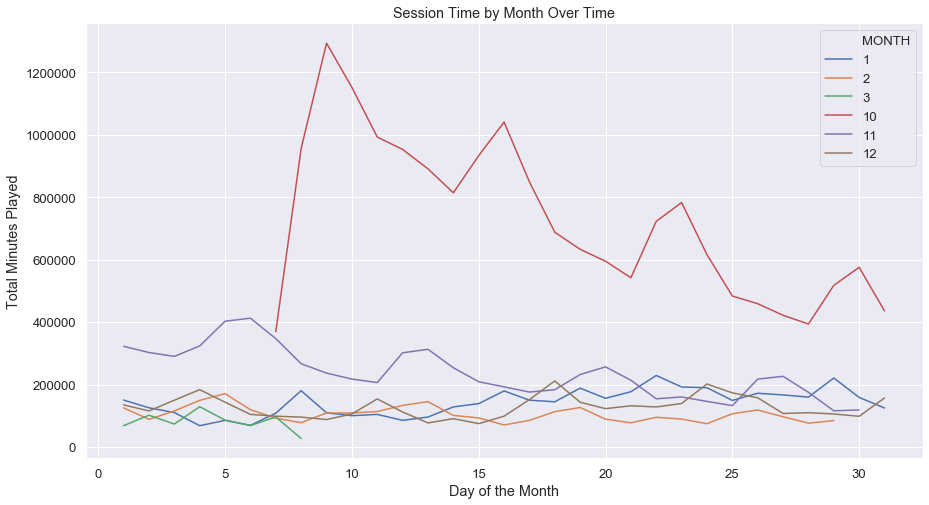

In [35]:
sns.set(font_scale = 1.2)

fig_dims = (15, 8)
fig, ax = plt.subplots(figsize=fig_dims)

_ = sns.lineplot(x="DAY_NUM", y="SESSION_TIME",
                  hue="MONTH", data=total_time_per_day.reset_index(),\
                  legend = 'full', palette = sns.color_palette(n_colors = 6)).set_title('Session Time by Month Over Time')

_ = plt.xlabel('Day of the Month')
_ = plt.ylabel('Total Minutes Played')

But what is weird is when we look at the average session time for players, we see that October actuall was quite low in October, even though it had the highest total. This could be attributed to the fact that there are just more players (which is why the total is still higher), but the reason as to why the average is lower is still unknown. 

One possible reason for this is when we look back at what a "session" really means, which is when a player changes maps, character, an event, etc. So when this "session" is lower, it could mean that in October, players were more adventurous and curious and switched up their playstyles more than the other months, when they found out what they liked at stuck with it. 

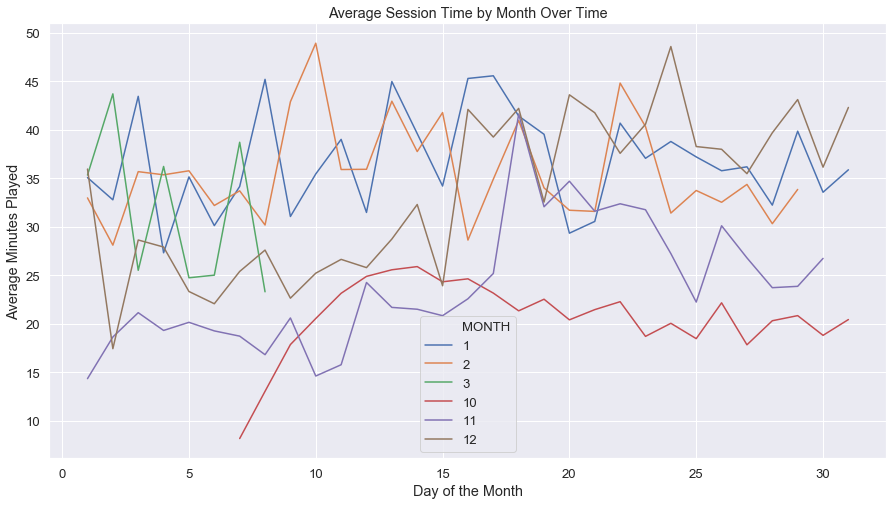

In [37]:
sns.set(font_scale = 1.2)

fig_dims = (15, 8)
fig, ax = plt.subplots(figsize=fig_dims)

_ = sns.lineplot(x="DAY_NUM", y="SESSION_TIME",
                  hue="MONTH", data=average_time_per_day.reset_index(),\
                  legend = 'full', palette = sns.color_palette(n_colors = 6)).set_title('Average Session Time by Month Over Time')

_ = plt.xlabel('Day of the Month')
_ = plt.ylabel('Average Minutes Played')

I want to see the final amount of time players played. Because I know that PLAYEDMINUTES is a cummulative column, I can find the highest number for each ID and that will be the final number of minutes played by each player. 

In [38]:
final_time = full_data.groupby('PLAYERID').max().PLAYEDMINUTES

In [39]:
final_time.reset_index().median()

PLAYEDMINUTES    2912.333333
dtype: float64

Total amount of played time in Minutes. Median is about 50 hours of gameplay

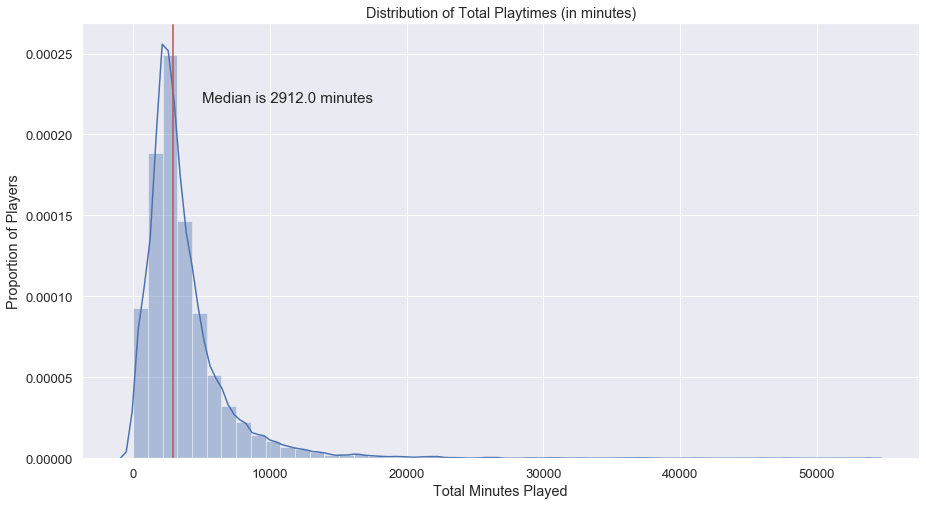

In [40]:
# This is a histogram of the Final amount of time Played along with a median. 

fig_dims = (15, 8)
fig, ax = plt.subplots(figsize=fig_dims)
_ = sns.set(font_scale = 1.2)

_ = sns.distplot(final_time, norm_hist = True).set_title('Distribution of Total Playtimes (in minutes)')
_ = plt.axvline(final_time.median(), color = 'r')
_ = plt.ylabel('Proportion of Players')
_ = plt.xlabel('Total Minutes Played')
_ = plt.text(x = 5000, y = 0.00022,\
             s = 'Median is {} minutes'.format(np.round(final_time.reset_index().median().values[0])), size = 15)


Let's look at the session times

In [41]:
# averaging out the session times for each user

average_session_time_by_user = full_data.groupby('PLAYERID').SESSION_TIME.mean()

In [44]:
average_session_time_by_user[0:10]

PLAYERID
000000001330b419a08d61c066962df8      9.859950
00000000e239c1adf1976a7bf1a7100c     88.493571
000000052c051d29f499a66e1e94a7b6     15.122825
0000000cedf47baeac050989bc728489     75.332514
00000010bf8189827104101ba4c79f2b     79.767725
00000010df6a2fe56f233e98e9a52d62     66.260753
00000011235ea9206ce129d2b1c64780    113.052358
0000001210e4a487b208c187f6162608     21.366084
00000012a32d6ac9879b96e1d078911d     15.347917
0000001530ba2a33787563300b387f08     22.793750
Name: SESSION_TIME, dtype: float64

There seems to be a really high max, which must be an input error. Will drop the outliers

In [46]:
# MAX session time is 8800 minutes. Either someone is highly addicted and has issues, or they left their game on, which shouldnt
# count towards the data

average_session_time_by_user.describe()

count    9995.000000
mean       35.194447
std       113.978369
min         0.021014
25%        16.850817
50%        26.199756
75%        40.942658
max      8799.883333
Name: SESSION_TIME, dtype: float64

In [47]:
average_session_time_by_user[average_session_time_by_user == average_session_time_by_user.max()]

PLAYERID
0000091ae5267f5780d6945c82800c1f    8799.883333
Name: SESSION_TIME, dtype: float64

In [50]:
# creating a function to drop outliers, since this is something that will be done multiple times probably

def drop_outliers(df, col):
    """
    df: dataframe to drop outliers from
    col: column that you want to drop outliers from
    return: returns the dataframe with the outliers dropped
    """
    
    # calculating the 1st and 3rd quartile
    q1 = df[col].quantile(.25)
    q3 = df[col].quantile(.75)
    
    # calculating inter quartile range
    iqr = q3 - q1
    
    # an outlier is defined as any value that is further than 1.5 times the inter quartile range
    df = df[(df[col] > q1*1.5*iqr) & (df[col] < q3*1.5*iqr)]
    
    return df

In [51]:
full_data = drop_outliers(full_data, 'SESSION_TIME')

In [52]:
average_session_time_by_user = full_data.groupby('PLAYERID').SESSION_TIME.mean()

The Outliers have been dropped

In [53]:
average_session_time_by_user.describe()

count    9945.000000
mean       60.681601
std        22.325404
min        23.550000
25%        45.947778
50%        56.444231
75%        69.882716
max       512.616667
Name: SESSION_TIME, dtype: float64

The median amount of time spent playing as a character in a session is 56 minutes (which seems about right)

In [54]:
median_average_time = np.round(average_session_time_by_user.median())
median_average_time

56.0

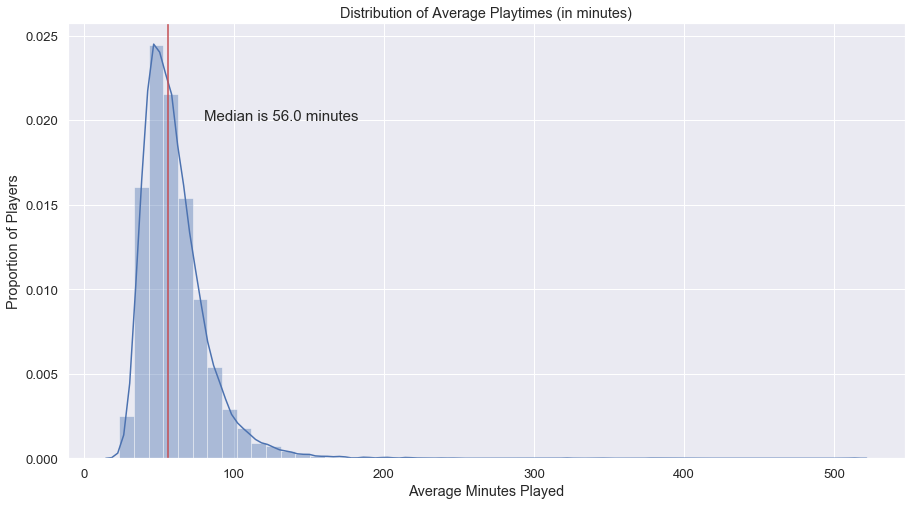

In [56]:
# similar to the histogram above, this shows that the median session time is 56 minutes

fig_dims = (15, 8)
fig, ax = plt.subplots(figsize=fig_dims)

_ = sns.distplot(average_session_time_by_user, norm_hist = True).set_title('Distribution of Average Playtimes (in minutes)')
_ = plt.axvline(median_average_time, color = 'r')
_ = plt.ylabel('Proportion of Players')
_ = plt.xlabel('Average Minutes Played')
_ = plt.text(x = 80, y = 0.02,\
             s = 'Median is {} minutes'.format(median_average_time), size = 15)

Let's look at how this number changes monthly

In [57]:
# summing up the session times for each player in each month, then finding the median for each month

average_playtime_by_user_month = full_data.groupby(['MONTH','PLAYERID']).SESSION_TIME.sum()\
                                    .groupby('MONTH').median().reset_index().sort_values(by = 'SESSION_TIME', ascending = False)

This furhter shows what we saw in the lineplot for total time played by day, where the total amount of time played in October exceeds the rest of the months. 

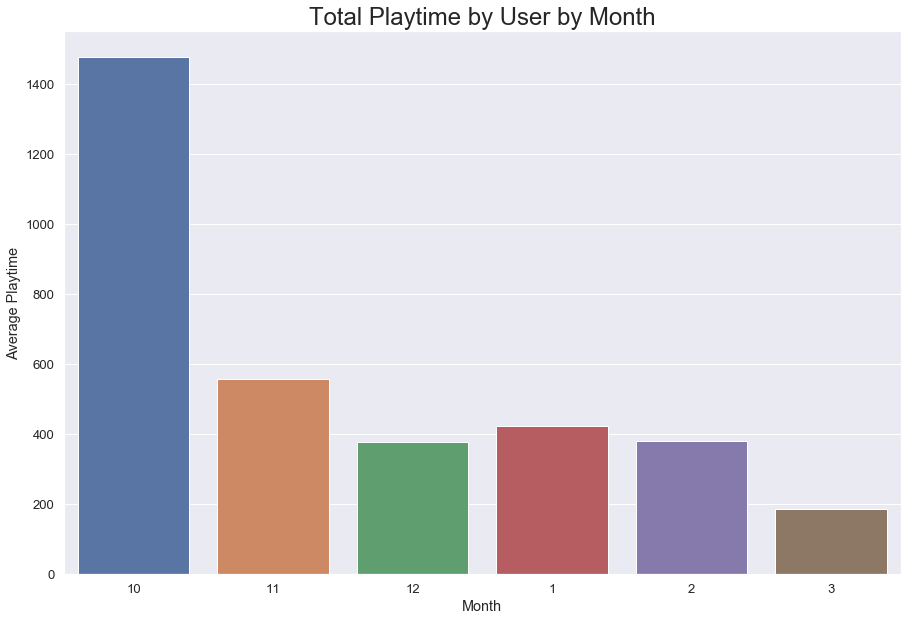

In [58]:
fig_dims = (15, 10)
fig, ax = plt.subplots(figsize=fig_dims)
_ = sns.set(font_scale = 2)

_ = sns.barplot(x = 'MONTH', y = 'SESSION_TIME', data = average_playtime_by_user_month, order = [10,11,12,1,2,3])\
.set_title('Total Playtime by User by Month')
_ = plt.ylabel('Average Playtime')
_ = plt.xlabel('Month')

In [59]:
# Taking the average session time of each player in each month, and then grouping by month and taking the median

average_session_user_month = full_data.groupby(['MONTH','PLAYERID']).SESSION_TIME.mean().groupby('MONTH').median().reset_index()

This also helps our point that October was played with shorter session times than the rest of the months, but still had the highest total amount of time played by each player. 

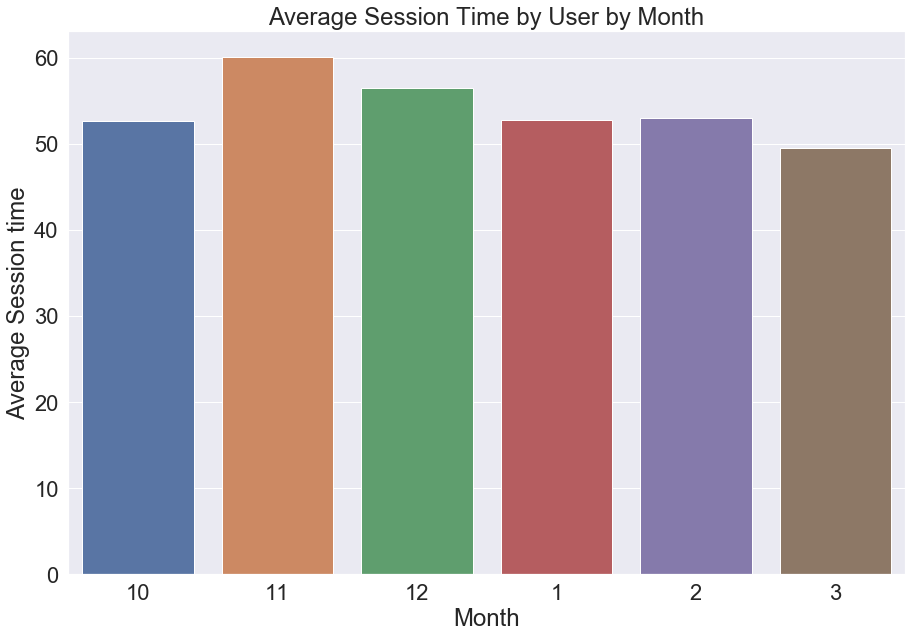

In [60]:
fig_dims = (15, 10)
fig, ax = plt.subplots(figsize=fig_dims)
_ = sns.set(font_scale = 2)

_ = sns.barplot(x = 'MONTH', y = 'SESSION_TIME', data = average_session_user_month, order = [10,11,12,1,2,3])\
.set_title('Average Session Time by User by Month')
_ = plt.ylabel('Average Session time')
_ = plt.xlabel('Month')

### Lets look at the different characters now.

Looking at the BPChar characters, who are the playable characters

In [61]:
# The BPChar prefix seems to be what designates a character as a playable character

session_char_player = full_data[full_data['CHARACTER'].str.contains('BPChar')].groupby(['CHARACTER','PLAYERID']).SESSION_TIME.mean().reset_index()
session_char_player

,CHARACTER,PLAYERID,SESSION_TIME
0,BPChar_Beastmaster_C,00000011235ea9206ce129d2b1c64780,23.833333
1,BPChar_Beastmaster_C,0000001210e4a487b208c187f6162608,62.730093
2,BPChar_Beastmaster_C,0000001530ba2a33787563300b387f08,48.136111
3,BPChar_Beastmaster_C,0000001b35a7bb4847d6cfbb1cdc8574,29.833333
4,BPChar_Beastmaster_C,0000002ada577478fb9e1038b8da84a0,52.023497
...,...,...,...
20909,BPChar_Siren_C,00004be2346fedc2a7a2f7254fd3545a,59.763095
20910,BPChar_Siren_C,00004be30a04ec64ad69ca9207707a42,25.927778
20911,BPChar_Siren_C,00004be4c6c6fd580a981afe677499ab,47.522549
20912,BPChar_Siren_C,00004be5a225876b05c4e2c1addc6a3a,41.977976


In [62]:
mean_play_char = session_char_player.groupby('CHARACTER').SESSION_TIME.mean()

In [63]:
mean_play_char

CHARACTER
BPChar_Beastmaster_C           54.049425
BPChar_Gunner_C                55.428682
BPChar_IronBear_C              56.543506
BPChar_IronBear_DakkaBear_C    55.742718
BPChar_Operative_C             52.171548
BPChar_Siren_C                 54.195352
Name: SESSION_TIME, dtype: float64

In [64]:
round(mean_play_char.loc['BPChar_Beastmaster_C'])

54.0

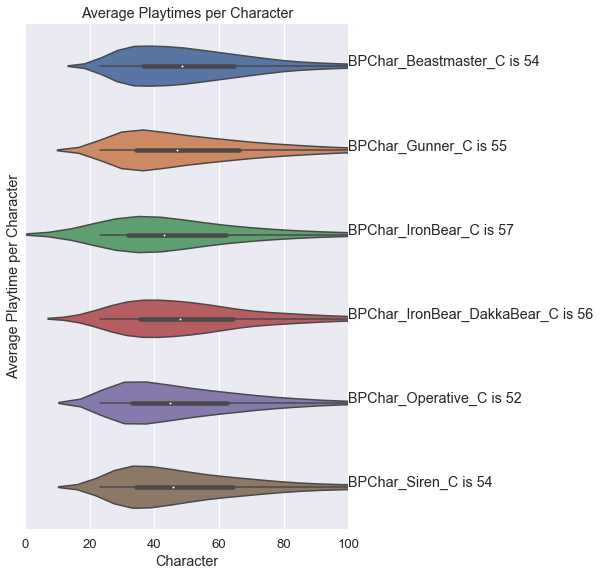

In [65]:
# this is a violin plot of the average amount of time a session is for each character. The way to read a violin plot is that the 
# thicker the plot, the more values instances there are in that value. 

_ = sns.set(font_scale = 1.2)

g = sns.catplot(x="SESSION_TIME", y="CHARACTER", kind="violin", data=session_char_player, height = 8, width = 0.5)
_ = plt.title('Average Playtimes per Character')
_ = plt.xlabel('Character')
_ = plt.ylabel('Average Playtime per Character')
_ = g.set(yticks = [])
_ = plt.xlim([0,100])


# adding the text on the right hand side with the averages
for ind,num, ind_num in zip(mean_play_char.index,mean_play_char, np.arange(6)):
    _ = plt.text(x = 100, y = ind_num, s = '{} is {}'.format(ind, round(num)))
             

As you can see above, the Operative is played with the lowest average playtime. This is in line with what we have seen previously, where The Operative the least played character. So not only are people playing this character less, but also for a slightly shorter amount of time. 

## Let's do some analyzing into how people are playing the game (what console)

Unfortunately, the platforms have been anonymized in this dataset. 

In [68]:
# counting up the unique number of players on each playform
platform_numbers = full_data.groupby('PLATFORM').PLAYERID.nunique().reset_index()

In [69]:
platform_numbers

,PLATFORM,PLAYERID
0,1,3234
1,2,3712
2,3,2994
3,4,5
4,5,2


Platform 2 has the most Unique Players, while platforms 4 and 5 almost don't even have any. 

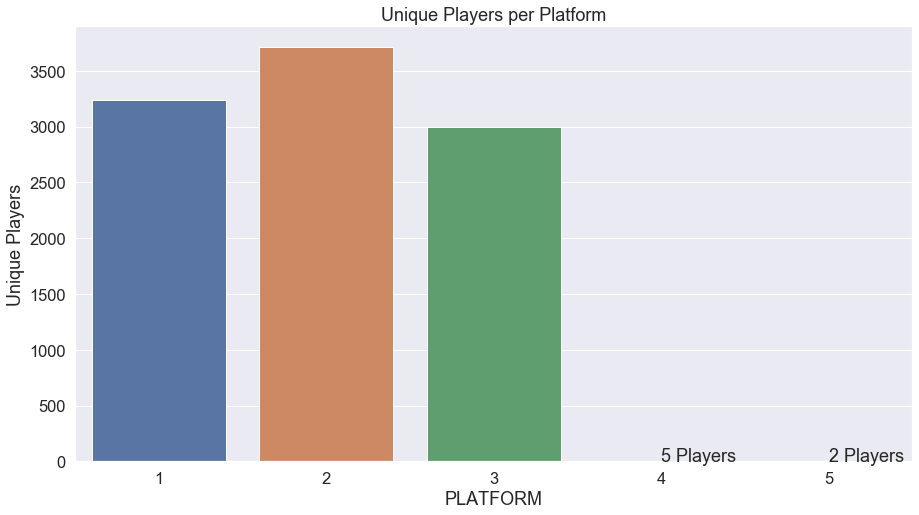

In [71]:
sns.set(font_scale = 1.5)

fig_dims = (15, 8)
fig, ax = plt.subplots(figsize=fig_dims)

_ = sns.barplot(x = 'PLATFORM', y = 'PLAYERID', data = platform_numbers.sort_values(by = 'PLAYERID',ascending = False))\
.set_title('Unique Players per Platform')

_ = plt.ylabel('Unique Players')

# adding the text to show how many players on 4 and 5 since you can't see their bars
_ = plt.text(x = 3, y = platform_numbers[platform_numbers['PLATFORM'] == 4]['PLAYERID'].values[0],\
             s = '{} Players'.format(platform_numbers[platform_numbers['PLATFORM'] == 4]['PLAYERID'].values[0]))

_ = plt.text(x = 4, y = platform_numbers[platform_numbers['PLATFORM'] == 5]['PLAYERID'].values[0],\
             s = '{} Players'.format(platform_numbers[platform_numbers['PLATFORM'] == 5]['PLAYERID'].values[0]))

In [72]:
# doing the same, except now grouping by month

unique_month_platform = full_data.groupby(['MONTH','PLATFORM']).PLAYERID.nunique().reset_index()

As you can see, Platform 3 starts out almost on par with Platforms 1 and 2, but quickly loses its market share. 

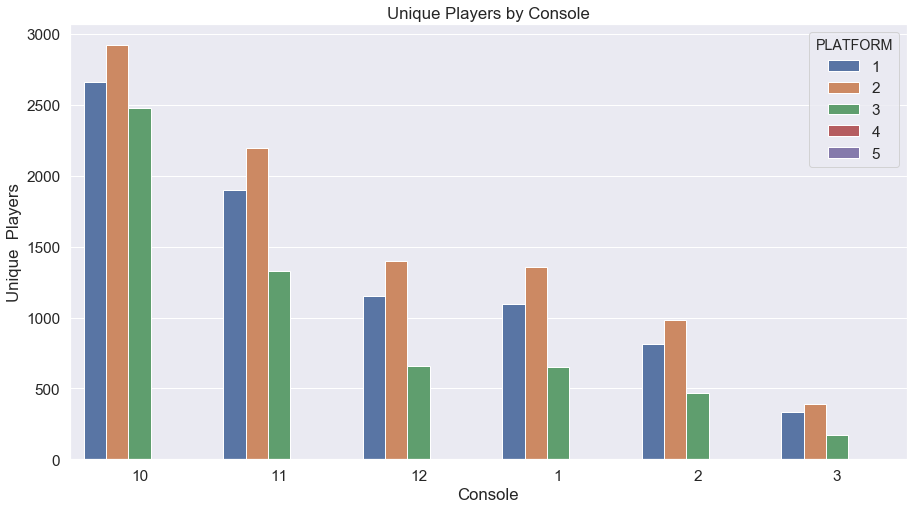

In [73]:
sns.set(font_scale = 1.4)

fig_dims = (15, 8)
fig, ax = plt.subplots(figsize=fig_dims)

_ = sns.barplot(x = 'MONTH', y = 'PLAYERID', hue = 'PLATFORM', data = unique_month_platform,\
                order = [10,11,12,1,2,3]).set_title('Unique Players by Console')
_ = plt.ylabel('Unique  Players')
_ = plt.xlabel('Console')

In [74]:
proportion_of_3 = 100*(unique_month_platform[unique_month_platform['PLATFORM'] == 3].groupby('MONTH').PLAYERID.sum()/\
unique_month_platform.groupby('MONTH').PLAYERID.sum()).sort_values(ascending = False)

In [75]:
# The proportion of 3 when compared to the rest of the platforms starts out at almost 31%, but then decreases to 19% by March

proportion_of_3

MONTH
10    30.727228
11    24.432971
1     20.861459
2     20.759717
12    20.516812
3     19.397993
Name: PLAYERID, dtype: float64

I want to see if people playing on consoles play the game differently (in terms of amount of time)

In [76]:
# getting the total amount of time played per player and platform

final_time_with_console = full_data.groupby(['PLATFORM','PLAYERID']).max().PLAYEDMINUTES

In [77]:
final_time_with_console

PLATFORM  PLAYERID                        
1         000000001330b419a08d61c066962df8     618.350000
          000000052c051d29f499a66e1e94a7b6    4459.016667
          0000000cedf47baeac050989bc728489    4595.283333
          00000012a32d6ac9879b96e1d078911d     122.783333
          0000002c7444a87a5640549065b827f3    3011.600000
                                                 ...     
4         00001f9cabef9bcd2db3e76e08988851    2810.600000
          00003200ce17ab5b8849a85b8e1b0139    3527.050000
          000039a0bed0bb18b81b1c6b50fd1330    1314.916667
5         0000377517fe859da260ebaec928d154    5884.616667
          0000377fa91431d5426b5ed00988be92     836.500000
Name: PLAYEDMINUTES, Length: 9947, dtype: float64

In [78]:
final_time_with_console.reset_index()

,PLATFORM,PLAYERID,PLAYEDMINUTES
0,1,000000001330b419a08d61c066962df8,618.350000
1,1,000000052c051d29f499a66e1e94a7b6,4459.016667
2,1,0000000cedf47baeac050989bc728489,4595.283333
3,1,00000012a32d6ac9879b96e1d078911d,122.783333
4,1,0000002c7444a87a5640549065b827f3,3011.600000
...,...,...,...
9942,4,00001f9cabef9bcd2db3e76e08988851,2810.600000
9943,4,00003200ce17ab5b8849a85b8e1b0139,3527.050000
9944,4,000039a0bed0bb18b81b1c6b50fd1330,1314.916667
9945,5,0000377517fe859da260ebaec928d154,5884.616667


Platforms 1 and 2 are fairly close to one another in median playing times. while Platform 3 lags slightly behind. 

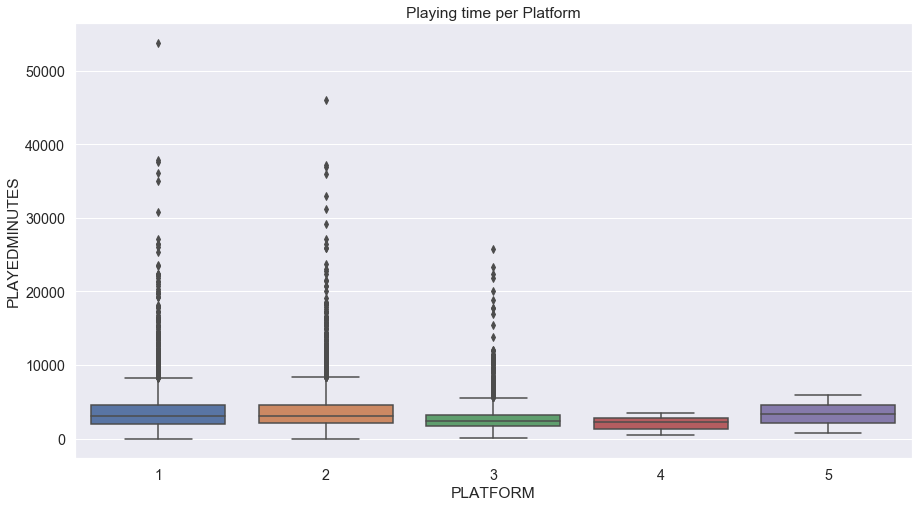

In [79]:
sns.set(font_scale = 1.3)

fig_dims = (15, 8)
fig, ax = plt.subplots(figsize=fig_dims)

_ = sns.boxplot(x = 'PLATFORM', y = 'PLAYEDMINUTES', data = final_time_with_console.reset_index()).set_title('Playing time per Platform')

Before we looked at TOTAL amount of time played, now we want to see the average session time for players using different consoles

In [80]:
# getting average session time for each platform

average_time_with_console = final_time_with_console.groupby('PLATFORM').mean().reset_index()

In [81]:
average_time_with_console

,PLATFORM,PLAYEDMINUTES
0,1,3822.893491
1,2,3840.195277
2,3,2760.347796
3,4,2093.006667
4,5,3360.558333


Consoles 3 is shorter than 1 and 2, and even 5, but as we know, 5 has very low sample sizes. 

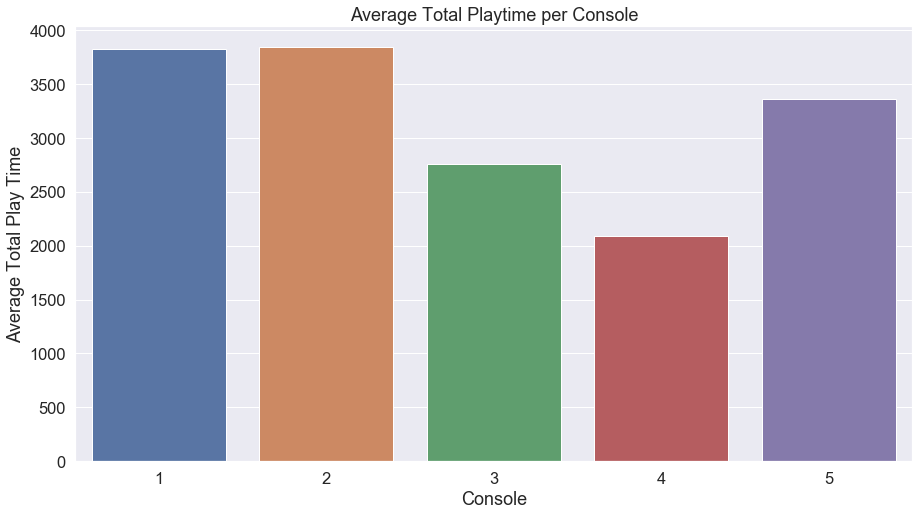

In [83]:
sns.set(font_scale = 1.5)

fig_dims = (15, 8)
fig, ax = plt.subplots(figsize=fig_dims)

_ = sns.barplot(x = 'PLATFORM', y = 'PLAYEDMINUTES', data = average_time_with_console).set_title('Average Total Playtime per Console')

_ = plt.ylabel('Average Total Play Time')
_ = plt.xlabel('Console')

How does this barchart change by month?

In [84]:
# doing the same as above, but separating by month

average_playtime_month_console = full_data.groupby(['MONTH','PLATFORM','PLAYERID']).SESSION_TIME.sum().groupby(['MONTH','PLATFORM']).mean().reset_index()

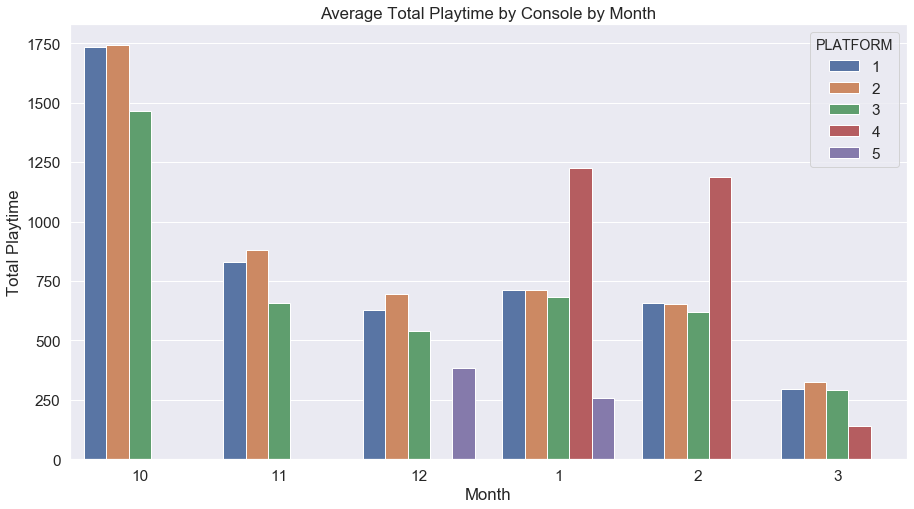

In [88]:
# Total playtimes started lower for platform 3, but became on par with 1 and 2 by January. Console 4 doesn't appear until January 
# either, but their playtimes quickly descend by March. Keep in mind that platform 4 also has small sample sizes.

sns.set(font_scale = 1.4)

fig_dims = (15, 8)
fig, ax = plt.subplots(figsize=fig_dims)

_ = sns.barplot(x = 'MONTH', y = 'SESSION_TIME', hue = 'PLATFORM', data = average_playtime_month_console,\
                order = [10,11,12,1,2,3]).set_title('Average Total Playtime by Console by Month')
_ = plt.ylabel('Total Playtime')
_ = plt.xlabel('Month')

In [89]:
# this is doing the same as above, but instead of getting the TOTAL playtime, we're getting the AVERAGE SESSION time. 

average_mean_playtime_month_console = full_data.groupby(['MONTH','PLATFORM','PLAYERID']).SESSION_TIME.mean().groupby(['MONTH','PLATFORM']).mean().reset_index()

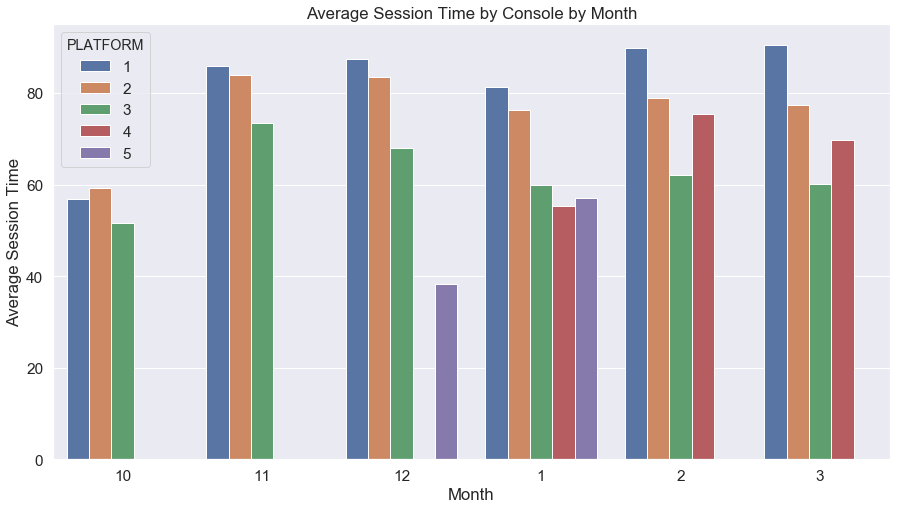

In [90]:
sns.set(font_scale = 1.4)

fig_dims = (15, 8)
fig, ax = plt.subplots(figsize=fig_dims)

_ = sns.barplot(x = 'MONTH', y = 'SESSION_TIME', hue = 'PLATFORM', data = average_mean_playtime_month_console,\
                order = [10,11,12,1,2,3]).set_title('Average Session Time by Console by Month')
_ = plt.ylabel('Average Session Time')
_ = plt.xlabel('Month')

## Importing the Sessions.csv and analyzing

In [92]:
import time
import dateutil
import matplotlib.dates as md

In [93]:
sessions = pd.read_csv('sessions.csv')

In [94]:
len(sessions)

118204

In [95]:
# the data came with a "timestamp" column, but this is not very helpful in readability, 
# so I converted it to date using pd.to_datetime

sessions['date'] = pd.to_datetime(sessions['timestamp'], unit='s')

This is only 5 hours worth of data

In [96]:
sessions.date.max() - sessions.date.min()

Timedelta('0 days 05:16:26')

In [97]:
sessions.sort_values(by = 'session_guid', ascending = False).head(10)

,timestamp,session_guid,hardware,map,unique_id,date
80116,1583809413,FFFF617048CA71C456C3688FDBAA4332,pc,CityVault_P,80116,2020-03-10 03:03:33
80115,1583809413,FFFF617048CA71C456C3688FDBAA4332,pc,CityVault_P,80115,2020-03-10 03:03:33
87000,1583810567,FFFF617048CA71C456C3688FDBAA4332,pc,CityBoss_P,87000,2020-03-10 03:22:47
111421,1583815148,FFFAF3DE455C6F52148BF0911709B409,xboxone,Sanctuary3_P,111421,2020-03-10 04:39:08
87488,1583810652,FFFA494E4EEFF9F8AB3499A20ED2429E,xboxone,WetlandsBoss_P,87488,2020-03-10 03:24:12
81032,1583809563,FFFA494E4EEFF9F8AB3499A20ED2429E,xboxone,WetlandsBoss_P,81032,2020-03-10 03:06:03
85700,1583810337,FFFA494E4EEFF9F8AB3499A20ED2429E,xboxone,WetlandsBoss_P,85700,2020-03-10 03:18:57
41884,1583803668,FFFA494E4EEFF9F8AB3499A20ED2429E,xboxone,MotorcadeInterior_P,41884,2020-03-10 01:27:48
50456,1583804882,FFFA494E4EEFF9F8AB3499A20ED2429E,xboxone,WetlandsBoss_P,50456,2020-03-10 01:48:02
43768,1583803929,FFFA494E4EEFF9F8AB3499A20ED2429E,xboxone,MotorcadeInterior_P,43768,2020-03-10 01:32:09


There are 22,000 unique "session_guid". I am assuming this is users, as no session_guid has more than one hardware.

In [98]:
sessions.groupby('session_guid').hardware.nunique().sort_values(ascending = False)

session_guid
FFFF617048CA71C456C3688FDBAA4332    1
0C02D29008D7C4620D9DE3BA0A716612    1
0C02B85008D7C44900D734680F520C64    1
0C02BCB808D7C49911F2B2530D1EB693    1
0C02BCBD08D7C473737C118A0ABEC7A2    1
                                   ..
694124DA4AF0BFAE42A9EF9C9ED19337    1
69428C5E4B81A78CBEFFC6850B052225    1
6948074E485552DFAEFBFABB3EFAE763    1
6948BB864495B0C7678FB1A682F30624    1
000133C24F2A3F794CD79E8E224CF27E    1
Name: hardware, Length: 22084, dtype: int64

In [99]:
sessions.session_guid.nunique()

22084

In [100]:
# calculating the number of unique users (sessions) by hardware. If one user has two sessions within 5 hours, then they
# are only counted once

users_by_hardware = sessions.groupby('hardware').session_guid.nunique().sort_values(ascending = False).reset_index()

There are twice as many PS4 and Xbox One users than on PC in this 5 hour period. 

In [101]:
users_by_hardware

,hardware,session_guid
0,ps4,9511
1,xboxone,8780
2,pc,3698
3,stadia,78
4,macosx,17


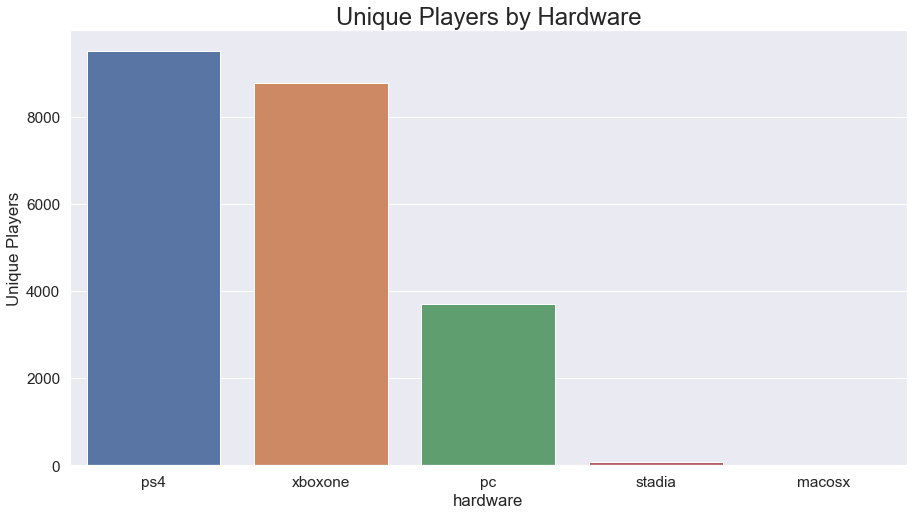

In [102]:
fig_dims = (15, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.set(font_scale =2)

_ = sns.barplot(x = 'hardware', y = 'session_guid', data = users_by_hardware).set_title('Unique Players by Hardware')
_ = plt.ylabel('Unique Players')

In [103]:
plays_by_hardware = sessions.groupby('hardware').session_guid.count().sort_values(ascending = False).reset_index()

Because there is only 5 hours of data, "Sessions" cannot mean play sessions, but rather instances where a player changed maps, characters, or weapons. 

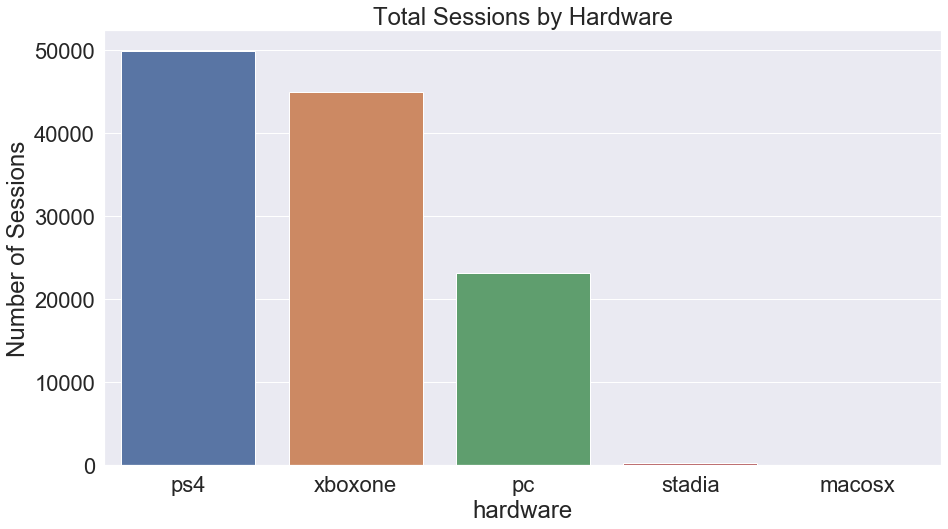

In [104]:
fig_dims = (15, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.set(font_scale =2)

_ = sns.barplot(x = 'hardware', y = 'session_guid', data = plays_by_hardware).set_title('Total Sessions by Hardware')
_ = plt.ylabel('Number of Sessions')

In [105]:
# calculating the number of "sessions" for each unique user

sessions_per_user_hardware = sessions.groupby(['hardware','session_guid'])\
.count().unique_id.groupby('hardware').mean().reset_index().sort_values( by = 'unique_id', ascending = False)

PC users actually have the highest number of Sessions on average. In order to calculate this, I took the number of sessions for each user separated by hardware, and calculated the average for each hardware. 

In [107]:
# PC users have more sessions per user than the rest

sessions_per_user_hardware

,hardware,unique_id
1,pc,6.245809
2,ps4,5.239407
4,xboxone,5.114351
3,stadia,4.141026
0,macosx,2.823529


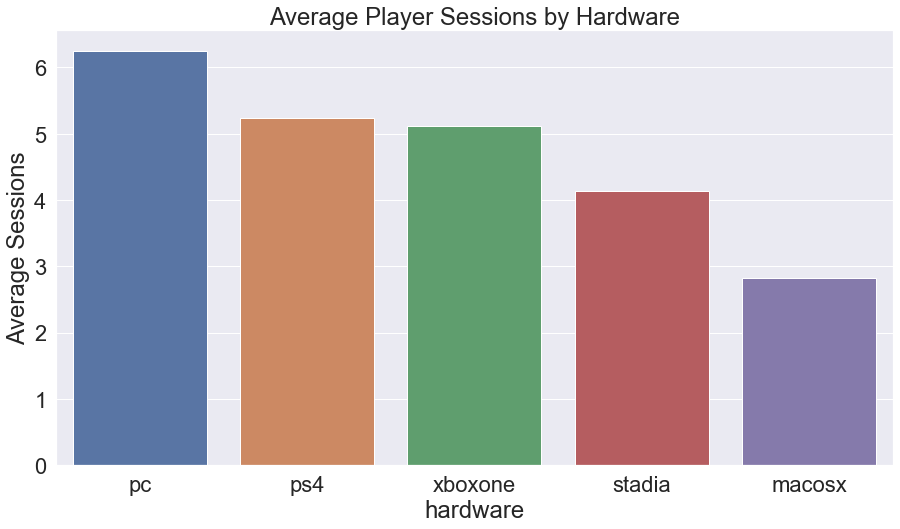

In [481]:
fig_dims = (15, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.set(font_scale =2)

_ = sns.barplot(x = 'hardware', y = 'session_guid', data = sessions_per_user_hardware)\
.set_title('Average Player Sessions by Hardware')

_ = plt.ylabel('Average Sessions')

What does this tell us? This tells use that, though there are fewer PC players than PS4 and XBox One, PC gamers in this 5 hour span have progressed further than their PS4 and Xbox One counterparts. 

### Playtime 

I want to see if players are playing the game differently in terms of playtime this subset of 5 hours. 

In [110]:
time_played_console = ((sessions.groupby(['hardware','session_guid']).date.max() - sessions.groupby(['hardware','session_guid']).date.min())\
.groupby('hardware').sum())/sessions.groupby(['hardware']).session_guid.nunique()

In [113]:
# just by looking at the numbers, PS4 and Xbox are about 1 hour, and PC is only around 50 minutes

time_played_console.sort_values(ascending = False).astype(str)

hardware
ps4        0 days 01:00:57.597203238
xboxone    0 days 01:00:49.542141230
pc         0 days 00:51:59.886425094
stadia     0 days 00:48:43.653846153
macosx     0 days 00:33:47.411764705
dtype: object

In [114]:
import matplotlib
from datetime import timedelta

C:\Users\miste\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:253: FutureWarning: Passing integers to fillna is deprecated, will raise a TypeError in a future version.  To retain the old behavior, pass pd.Timedelta(seconds=n) instead.
  data = data.fillna(fillna)


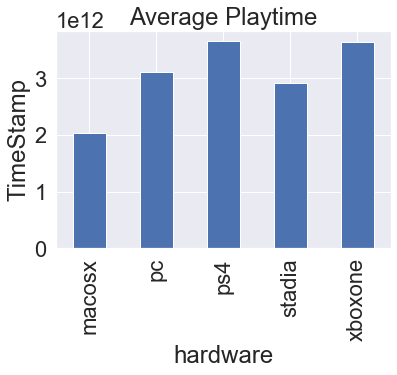

In [115]:

_ = time_played_console.plot(kind = 'bar')
_ = plt.ylabel('TimeStamp')
_ = plt.title('Average Playtime')


In [117]:
weapons = pd.read_csv('weapons.csv')

In [118]:
len(weapons)

1070501

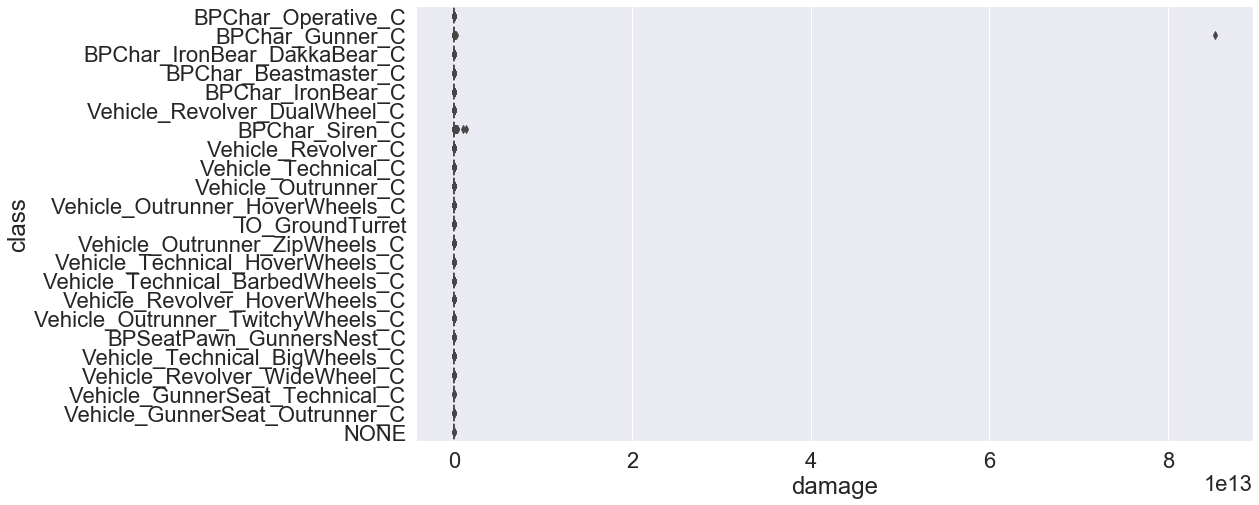

In [119]:
# checking to see the damgage for each weapons

fig_dims = (15, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.set(font_scale =2)

_ = sns.boxplot(x = 'damage', y = 'class', data = weapons)

This is much higher than anything else by a few orders of magnitude, so I am going to drop those outside of the InterQuartile Range

In [120]:
weapons = drop_outliers(weapons, 'damage')

A lot of the data is on different orders of magnitudes of the median

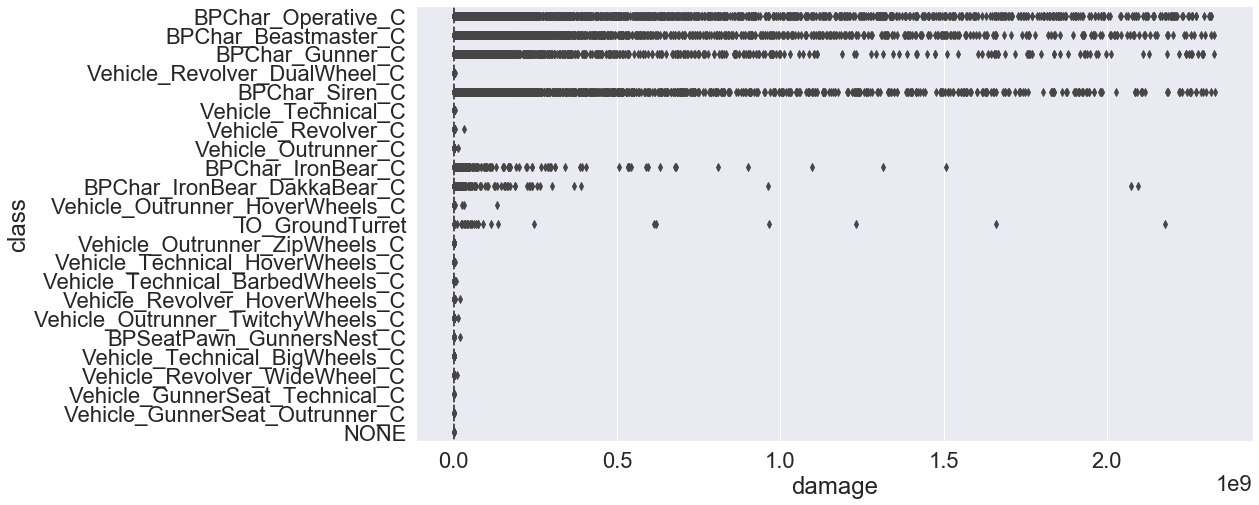

In [121]:
fig_dims = (15, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.set(font_scale =2)

_ = sns.boxplot(x = 'damage', y = 'class', data = weapons)

In [124]:
import matplotlib.axes as axe

[None]

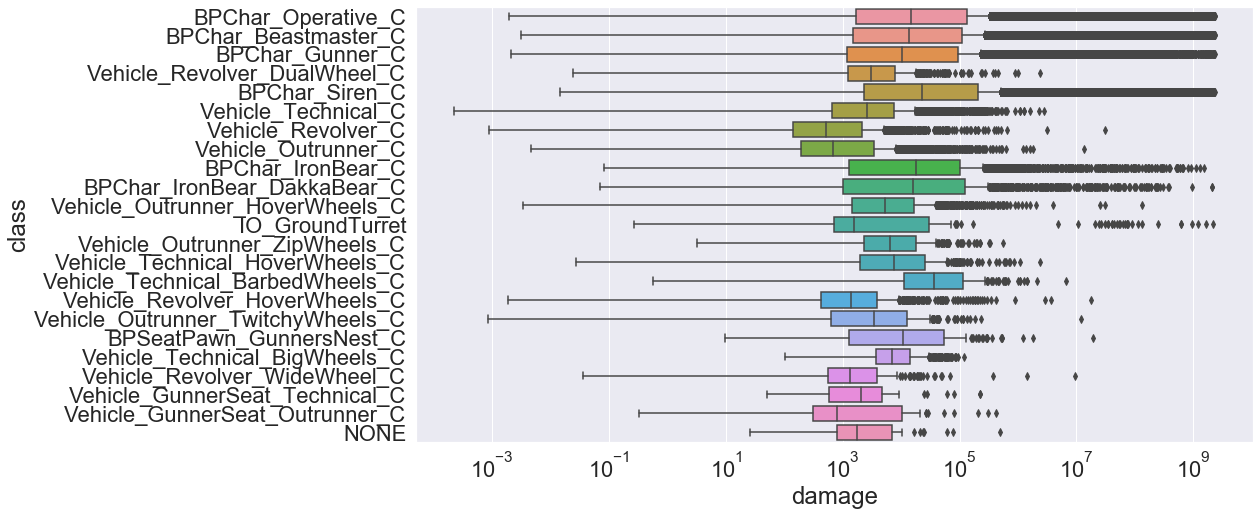

In [130]:
fig_dims = (15, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.set(font_scale =2)

splot = sns.boxplot(x = 'damage', y = 'class', data = weapons)

splot.set(xscale = 'log')


Using Boxplots, it is hard to see what who does the most damage, but with a log scale, you can see that most damage falls in the 10^3 range, and a lot of damage extends all the way to 10^7 and even 10^9. 

In [131]:
average_damage_class = weapons.groupby('class').damage.mean().reset_index().sort_values(by = 'damage', ascending = False)

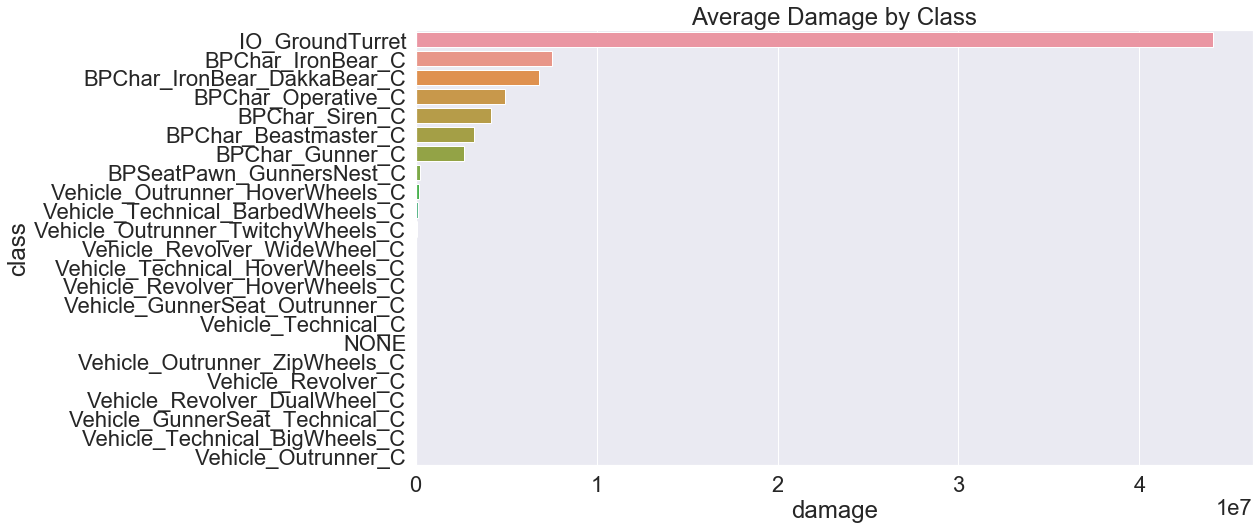

In [132]:
fig_dims = (15, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.set(font_scale =2)

_ = sns.barplot(x = 'damage', y = 'class', data = average_damage_class).set_title('Average Damage by Class')

As you can see, the Operative actually does slightly more average damage than the other 3 classes, so it is intersting that he is the least played (though not by much).